# Solutions

1. Course Data
1. Learning vs Machine Learning
1. The Machine Learning Model
1. [Assessing Task Performance](#4.-Assessing-Task-Performance)
1. Exploratory Data Analysis

## 4. Assessing Task Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
housing = pd.read_csv('../data/housing_sample.csv')
housing.head(3)

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,223500


In [2]:
# models
mean_price = housing['SalePrice'].mean()
price_per_sq_foot = (housing['SalePrice'] / housing['GrLivArea']).mean()
group_price = [housing.query('GrLivArea < 1500')['SalePrice'].mean(),
               housing.query('1500 <= GrLivArea <= 2000')['SalePrice'].mean(),
               housing.query('GrLivArea > 2000')['SalePrice'].mean()]

def model_1_simple_avg(sq_foot):
    return round(mean_price, -3)

def model_2_avg_ppsf(sq_foot):
    return round(price_per_sq_foot * sq_foot, -3)

def model_3_bin_avg(sq_foot):
    cat = 0 if sq_foot < 1500 else 1 if sq_foot <= 2000 else 2
    return group_price[cat]

def make_prediction(model, X):
    return np.array([model(x) for x in X])

def plot_error(X, y, models, error_func):
    errors = pd.Series({model.__name__: error_func(X, y, model) for model in models})
    return errors.plot(kind='bar', figsize=(8, 4), title=error_func.__name__, rot=0)

### Exercise 1

<span  style="color:green; font-size:16px">Create functions that calculate task performance for each of the following error metrics:</span>


<span  style="color:green; font-size:16px">
    
* Mean Absolute Error (MAE) - find the absolute error of each prediction, then return the mean of these values
* Maximum Absolute Error - find the absolute error of each prediction, then return the maximum of these values
* Mean of Cubed Error - find the absolute value of the cubed error of each, then return the mean of these values
* Mean Logged Error - find the absolute error of each prediction, then take the natural logarithm of each, and return the mean of these values.
* Come up with your own error metric

</span>

<span style="color:green; font-size:16px">Use each function individually to get the performance measurement on model 3 from above. Then use the `plot_error` function to plot each error for each model.</span>

In [3]:
def mae(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    abs_error = error.abs()
    return abs_error.mean()

def max_ae(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    abs_error = error.abs()
    return abs_error.max()

def mce(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    abs_error = error.abs()
    cubed_error = abs_error ** 3
    return cubed_error.mean()

def mle(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    abs_error = error.abs()
    log_error = np.log1p(abs_error)
    return log_error.mean()

# own error metric
# mean of five largest absolute errors
def mean_5_largest(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    abs_error = error.abs()
    return np.sort(abs_error)[-5:].mean()

In [4]:
X = housing['GrLivArea']
y = housing['SalePrice']

In [5]:
mae(X, y, model_3_bin_avg)

42501.14896212044

In [6]:
max_ae(X, y, model_3_bin_avg)

473303.7570093458

In [7]:
mce(X, y, model_3_bin_avg)

576345172716458.8

In [8]:
mle(X, y, model_3_bin_avg)

10.1294339822797

In [9]:
mean_5_largest(X, y, model_3_bin_avg)

382221.7570093458

Put the models in a list and then call the `plot_error` function for any error from above. Here, we do so for the mean absolute error.

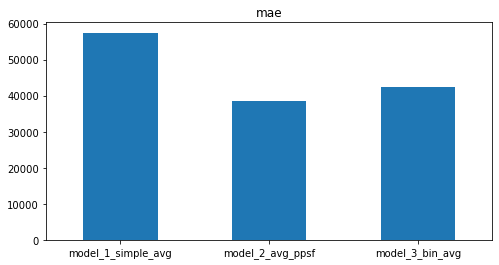

In [10]:
models = [model_1_simple_avg, model_2_avg_ppsf, model_3_bin_avg]
plot_error(X, y, models, mae)